# Loading data

In [1]:
!pip install kaggle


  Running setup.py bdist_wheel for kaggle: started
  Running setup.py bdist_wheel for kaggle: finished with status 'done'
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\ee\97\c5\87dcdc9434fe4e632ed5945e31a03703af229db178ef6a00e8
  Running setup.py bdist_wheel for python-slugify: started
  Running setup.py bdist_wheel for python-slugify: finished with status 'done'
  Stored in directory: C:\Users\DELL\AppData\Local\pip\Cache\wheels\16\7f\c3\6b0582283ad589d68a306da924a78c74546e010d8106b9b3a9
Successfully built kaggle python-slugify


In [ ]:
!mkdir ~/.kaggle
!mkdir ./.kaggle
import json
token = {"username":"abdelrahmanyaseen","key":"985f2fe9e90a1e43fc2d88ee0801b263"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

kaggle competitions download -c otto-group-product-classification-challenge
!unzip ./{/content}/competitions/otto-group-product-classification-challenge/train.csv.zip


In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer






data = pd.read_csv("train.csv",skipinitialspace=True,na_values='?')
# data=data.fillna(0)
# data=data.drop('e',axis='columns')

# test_data = pd.read_csv("test.csv",skipinitialspace=True,na_values='?')

# test_data=test_data.drop('e',axis='columns')
inputs = data.drop('target',axis='columns')# the inputs are all columns in the dataset except income
inputs=inputs.drop('id',axis='columns')
target = data['target']
# imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
# imputer=imputer.fit(inputs)
# inputs=imputer.transform(inputs)
# print(data)

# inputs=pd.get_dummies(inputs, sparse=True) 
inputs=inputs.values
target=target.values



# MLP classifier

In [2]:

X_train, X_test, y_train, y_test = train_test_split(inputs, target, random_state=0)


mlp = MLPClassifier().fit(X_train,y_train)


print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train,y_train )))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test, y_test)))



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on the training subset: 0.896
Accuracy on the test subset: 0.778


# trying with data scaling

In [3]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=10, random_state=10)   

mlp.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum

Accuracy on the training subset: 0.812
Accuracy on the test subset: 0.785


## change some parameters

In [6]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset: 0.781
Accuracy on the test subset: 0.769


# KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)  

print('Accuracy on the training subset: {:.3f}'.format(knn.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(knn.score(X_test_scaled, y_test)))

Accuracy on the training subset: 0.839
Accuracy on the test subset: 0.764


# SVM

In [13]:
import sys, os
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV

clf = svm.SVC(kernel='linear')
clf=clf.fit(X_train_scaled,y_train)
print('Accuracy on the training subset: {:.3f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_scaled, y_test)))

Accuracy on the training subset: 0.776
Accuracy on the test subset: 0.767


# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test_scaled, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.806


## using max scalar 

In [14]:
from sklearn.preprocessing import MinMaxScaler

X_train_scaled=MinMaxScaler().fit_transform(X_train)
X_test_scaled=MinMaxScaler().fit_transform(X_test)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train_scaled, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test_scaled, y_test)))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.798


## Feature importnace 

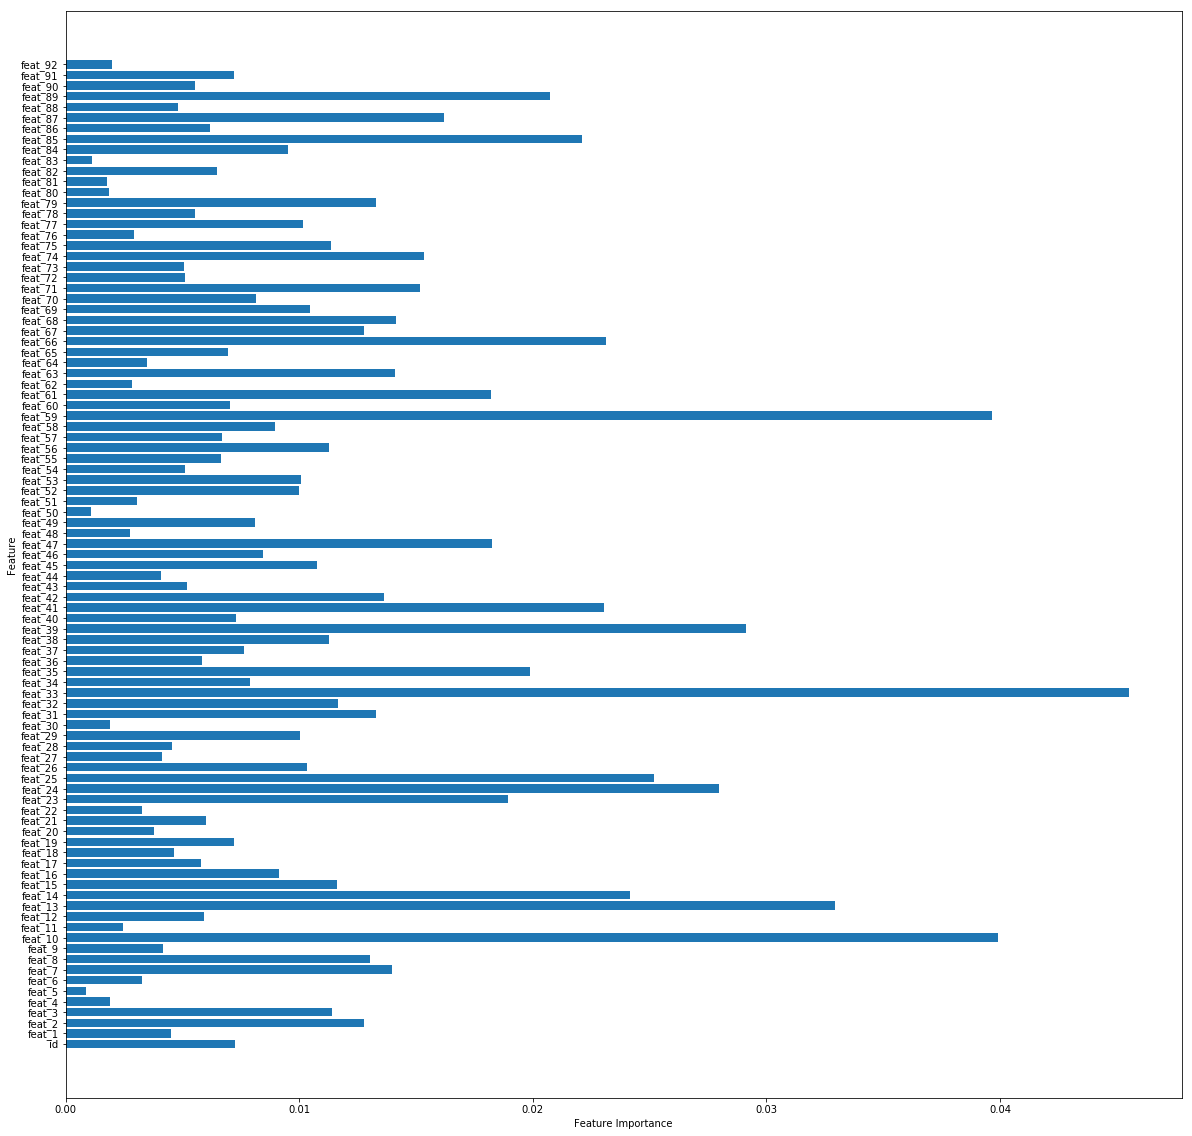

In [11]:
n_features = inputs.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


## xgboost 

In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
print('Accuracy on the training subset: {:.3f}'.format(model.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(model.score(X_test_scaled, y_test)))

Accuracy on the training subset: 0.781
Accuracy on the test subset: 0.768


In [ ]:
# y_true = y_test# ground truth labels
# y_probas = model.predict(X_test_scaled)

# class_labels = LabelEncoder()
# y_true = class_labels.fit_transform(y_true)
# class_labels = LabelEncoder()
# y_probas = class_labels.fit_transform(y_probas)


# # y_pred_proba = mlp.predict_proba(X_test)[::,1]


# fpr, tpr, _ = metrics.roc_curve(y_true,  y_probas)
# auc = metrics.roc_auc_score(y_true, y_probas)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

#### trying to get better results using using feature selection 

The shape of X_train is:  (46408, 93)
The shape of X_train_s is  (46408, 47)
Accuracy on the training subset: 0.999
Accuracy on the test subset: 0.794


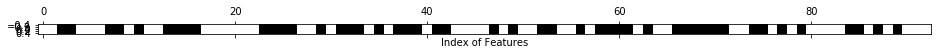

In [24]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')
select.fit(X_train, y_train)
X_train_s = select.transform(X_train)
X_test_s = select.transform(X_test)
print('The shape of X_train is: ', X_train.shape)
print('The shape of X_train_s is ', X_train_s.shape)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train_s, y_train)

print('Accuracy on the training subset: {:.3f}'.format(forest.score(X_train_s, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest.score(X_test_s, y_test)))


In [25]:
model = XGBClassifier()
model.fit(X_train_s, y_train)
print('Accuracy on the training subset: {:.3f}'.format(model.score(X_train_s, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(model.score(X_test_s, y_test)))

Accuracy on the training subset: 0.764
Accuracy on the test subset: 0.750


In [26]:
clf = svm.SVC(kernel='linear')
clf=clf.fit(X_train_s,y_train)
print('Accuracy on the training subset: {:.3f}'.format(clf.score(X_train_s, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(clf.score(X_test_s, y_test)))


Accuracy on the training subset: 0.750
Accuracy on the test subset: 0.743


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_s, y_train)  

print('Accuracy on the training subset: {:.3f}'.format(knn.score(X_train_s, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(knn.score(X_test_s, y_test)))

Accuracy on the training subset: 0.833
Accuracy on the test subset: 0.759


### as we can see the accuracy range is between 75% and 80% from above models. the best accuracy achieaved by random forest model  